# Overview
### 1. Requirements Analysis
### 2. EDA;Exploratory Data Analysis 
### 3. Modeling
### 4. Hyperparameters Tuning  
### 5. Model Save

## 1. Requirements Analysis

## 2. EDA

In [2]:
# impory library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# set display options
pd.set_option('display.max_rows', 1000)  
pd.set_option('display.max_columns', 1000)

In [3]:
# Data load
train_df = pd.read_csv('./dataset/ai_smatii_outlier_train.csv', index_col=0)
test_df = pd.read_csv('./dataset/ai_smatii_outlier_test.csv', index_col=0)

train_df.head()

,xacc_RAW_IMU,nav_pitch_NAV_CONTROLLER_OUTPUT,xgyro_RAW_IMU,zgyro_RAW_IMU,vy_GLOBAL_POSITION_INT,yacc_RAW_IMU,chan14_raw_RC_CHANNELS,chan12_raw_RC_CHANNELS,vibration_x_VIBRATION,accel_cal_z_SENSOR_OFFSETS,vx_LOCAL_POSITION_NED,zacc_RAW_IMU,groundspeed_VFR_HUD,servo8_raw_SERVO_OUTPUT_RAW,pitch_ATTITUDE,ygyro_RAW_IMU,yaw_ATTITUDE,Vservo_POWER_STATUS,servo3_raw_SERVO_OUTPUT_RAW,x_LOCAL_POSITION_NED,chan13_raw_RC_CHANNELS,voltages1_BATTERY_STATUS,mag_ofs_x_SENSOR_OFFSETS,chan16_raw_RC_CHANNELS,airspeed_VFR_HUD,chancount_RC_CHANNELS,xmag_RAW_IMU,nav_bearing_NAV_CONTROLLER_OUTPUT,accel_cal_x_SENSOR_OFFSETS,roll_ATTITUDE,zmag_RAW_IMU,vibration_y_VIBRATION,mag_ofs_y_SENSOR_OFFSETS,vibration_z_VIBRATION,vy_LOCAL_POSITION_NED,vx_GLOBAL_POSITION_INT,press_abs_SCALED_PRESSURE,accel_cal_y_SENSOR_OFFSETS,ymag_RAW_IMU,chan15_raw_RC_CHANNELS,loginfo
0,0.257996,0.531179,0.433329,0.520224,0.472851,0.243184,0.814169,0.744766,0.011300,0.291499,0.423668,0.504735,0.053529,0.0,0.382567,0.451477,0.434830,0.00000,0.388889,0.481463,0.736323,0.738582,0.375358,0.735961,0.041263,1.0,0.635232,0.436111,0.350693,0.510928,0.451460,0.013286,0.36859,0.013622,0.472215,0.423618,0.978635,0.910376,0.848711,0.744766,normal
1,0.258922,0.526175,0.428617,0.519374,0.480183,0.247555,0.814169,0.744766,0.011206,0.291499,0.428878,0.507830,0.040223,0.0,0.375482,0.449940,0.434366,0.00000,0.389918,0.481321,0.736323,0.736522,0.375358,0.735961,0.041975,1.0,0.637147,0.436111,0.350693,0.524941,0.449713,0.019232,0.36859,0.016669,0.480322,0.429365,0.978551,0.910376,0.861262,0.744766,normal
2,0.258922,0.535333,0.419349,0.519439,0.499561,0.246681,0.814169,0.744766,0.013552,0.291499,0.437742,0.505463,0.011039,0.0,0.383907,0.448979,0.433274,0.00000,0.380658,0.481297,0.736323,0.736431,0.375358,0.735961,0.015536,1.0,0.634993,0.436111,0.350693,0.515603,0.451335,0.031248,0.36859,0.028947,0.498508,0.437764,0.978533,0.910376,0.855834,0.744766,normal
3,0.258423,0.545212,0.412595,0.520224,0.500609,0.242310,0.814169,0.744766,0.008066,0.291499,0.436369,0.501823,0.010793,0.0,0.387915,0.454038,0.436290,0.00037,0.413580,0.481312,0.736323,0.732815,0.375358,0.735961,0.013897,1.0,0.634514,0.436111,0.350693,0.515110,0.451460,0.014328,0.36859,0.015486,0.499901,0.436437,0.978467,0.910376,0.854817,0.744766,normal
4,0.257925,0.539921,0.416050,0.519766,0.502704,0.242018,0.814169,0.744766,0.008227,0.291499,0.433227,0.506191,0.011109,0.0,0.383268,0.453718,0.435992,0.00000,0.401235,0.481330,0.736323,0.735683,0.375358,0.735961,0.005202,1.0,0.635232,0.436111,0.350693,0.521087,0.450087,0.013717,0.36859,0.012253,0.502453,0.433343,0.978398,0.910376,0.858887,0.744766,normal


In [4]:
# dataframe의 feature data 유사 변수명 기준 정렬
train_df = train_df[['xacc_RAW_IMU','zacc_RAW_IMU','yacc_RAW_IMU',
'xgyro_RAW_IMU','ygyro_RAW_IMU','zgyro_RAW_IMU',
'xmag_RAW_IMU','ymag_RAW_IMU','zmag_RAW_IMU',
'vibration_x_VIBRATION','vibration_y_VIBRATION','vibration_z_VIBRATION',
'accel_cal_y_SENSOR_OFFSETS','accel_cal_x_SENSOR_OFFSETS','accel_cal_z_SENSOR_OFFSETS',
'chan12_raw_RC_CHANNELS','chan13_raw_RC_CHANNELS','chan14_raw_RC_CHANNELS',
'chan15_raw_RC_CHANNELS','chan16_raw_RC_CHANNELS','chancount_RC_CHANNELS',
'roll_ATTITUDE','pitch_ATTITUDE','yaw_ATTITUDE',
'x_LOCAL_POSITION_NED','vx_LOCAL_POSITION_NED','vy_LOCAL_POSITION_NED',
'vx_GLOBAL_POSITION_INT','vy_GLOBAL_POSITION_INT',
'mag_ofs_x_SENSOR_OFFSETS','mag_ofs_y_SENSOR_OFFSETS',
'servo3_raw_SERVO_OUTPUT_RAW','servo8_raw_SERVO_OUTPUT_RAW',
'airspeed_VFR_HUD','groundspeed_VFR_HUD',
'Vservo_POWER_STATUS','voltages1_BATTERY_STATUS',
'nav_bearing_NAV_CONTROLLER_OUTPUT','nav_pitch_NAV_CONTROLLER_OUTPUT',
'press_abs_SCALED_PRESSURE', 'loginfo']]

test_df = test_df[['xacc_RAW_IMU','zacc_RAW_IMU','yacc_RAW_IMU',
'xgyro_RAW_IMU','ygyro_RAW_IMU','zgyro_RAW_IMU',
'xmag_RAW_IMU','ymag_RAW_IMU','zmag_RAW_IMU',
'vibration_x_VIBRATION','vibration_y_VIBRATION','vibration_z_VIBRATION',
'accel_cal_y_SENSOR_OFFSETS','accel_cal_x_SENSOR_OFFSETS','accel_cal_z_SENSOR_OFFSETS',
'chan12_raw_RC_CHANNELS','chan13_raw_RC_CHANNELS','chan14_raw_RC_CHANNELS',
'chan15_raw_RC_CHANNELS','chan16_raw_RC_CHANNELS','chancount_RC_CHANNELS',
'roll_ATTITUDE','pitch_ATTITUDE','yaw_ATTITUDE',
'x_LOCAL_POSITION_NED','vx_LOCAL_POSITION_NED','vy_LOCAL_POSITION_NED',
'vx_GLOBAL_POSITION_INT','vy_GLOBAL_POSITION_INT',
'mag_ofs_x_SENSOR_OFFSETS','mag_ofs_y_SENSOR_OFFSETS',
'servo3_raw_SERVO_OUTPUT_RAW','servo8_raw_SERVO_OUTPUT_RAW',
'airspeed_VFR_HUD','groundspeed_VFR_HUD',
'Vservo_POWER_STATUS','voltages1_BATTERY_STATUS',
'nav_bearing_NAV_CONTROLLER_OUTPUT','nav_pitch_NAV_CONTROLLER_OUTPUT',
'press_abs_SCALED_PRESSURE', 'loginfo']]

In [5]:
print(train_df.shape, test_df.shape)    # train(1173933, 41) test(293484, 41)

(1173933, 41) (293484, 41)


In [6]:
# Missing vlaue check : 0
train_df.info() # all of feature data is numerical data
                # numerical data need to scaleing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173933 entries, 0 to 395928
Data columns (total 41 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   xacc_RAW_IMU                       1173933 non-null  float64
 1   zacc_RAW_IMU                       1173933 non-null  float64
 2   yacc_RAW_IMU                       1173933 non-null  float64
 3   xgyro_RAW_IMU                      1173933 non-null  float64
 4   ygyro_RAW_IMU                      1173933 non-null  float64
 5   zgyro_RAW_IMU                      1173933 non-null  float64
 6   xmag_RAW_IMU                       1173933 non-null  float64
 7   ymag_RAW_IMU                       1173933 non-null  float64
 8   zmag_RAW_IMU                       1173933 non-null  float64
 9   vibration_x_VIBRATION              1173933 non-null  float64
 10  vibration_y_VIBRATION              1173933 non-null  float64
 11  vibration_z_VIBRATION    

In [7]:
# label data encording : we use label encoder becuase it has only two class
from sklearn.preprocessing import LabelEncoder
train_df['loginfo'] = LabelEncoder().fit_transform(train_df['loginfo']) # normal:1 / fail:0
test_df['loginfo'] = LabelEncoder().fit_transform(test_df['loginfo']) # normal:1 / fail:0

In [8]:
train_df.describe()

,xacc_RAW_IMU,zacc_RAW_IMU,yacc_RAW_IMU,xgyro_RAW_IMU,ygyro_RAW_IMU,zgyro_RAW_IMU,xmag_RAW_IMU,ymag_RAW_IMU,zmag_RAW_IMU,vibration_x_VIBRATION,vibration_y_VIBRATION,vibration_z_VIBRATION,accel_cal_y_SENSOR_OFFSETS,accel_cal_x_SENSOR_OFFSETS,accel_cal_z_SENSOR_OFFSETS,chan12_raw_RC_CHANNELS,chan13_raw_RC_CHANNELS,chan14_raw_RC_CHANNELS,chan15_raw_RC_CHANNELS,chan16_raw_RC_CHANNELS,chancount_RC_CHANNELS,roll_ATTITUDE,pitch_ATTITUDE,yaw_ATTITUDE,x_LOCAL_POSITION_NED,vx_LOCAL_POSITION_NED,vy_LOCAL_POSITION_NED,vx_GLOBAL_POSITION_INT,vy_GLOBAL_POSITION_INT,mag_ofs_x_SENSOR_OFFSETS,mag_ofs_y_SENSOR_OFFSETS,servo3_raw_SERVO_OUTPUT_RAW,servo8_raw_SERVO_OUTPUT_RAW,airspeed_VFR_HUD,groundspeed_VFR_HUD,Vservo_POWER_STATUS,voltages1_BATTERY_STATUS,nav_bearing_NAV_CONTROLLER_OUTPUT,nav_pitch_NAV_CONTROLLER_OUTPUT,press_abs_SCALED_PRESSURE,loginfo
count,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06
mean,2.634723e-01,5.547921e-01,2.731790e-01,4.195418e-01,4.534686e-01,5.200028e-01,5.619067e-01,8.355901e-01,4.325582e-01,6.411188e-02,1.149461e-01,6.618194e-02,5.939645e-01,5.510706e-01,4.170027e-01,7.210990e-01,4.883297e-01,5.444267e-01,9.570726e-02,9.502661e-02,1.287220e-01,4.517169e-01,4.142268e-01,6.094788e-01,4.515024e-01,4.382511e-01,5.070944e-01,4.382445e-01,5.070999e-01,3.881984e-01,5.036723e-01,4.885102e-01,1.023201e-01,1.228513e-01,1.377248e-01,1.276371e-01,3.654184e-01,6.170910e-01,5.226483e-01,9.589448e-01,6.627329e-01
std,1.557399e-02,1.044137e-01,6.189479e-02,1.049405e-02,7.080269e-03,7.508271e-03,5.488857e-02,5.479530e-02,4.164295e-02,6.127382e-02,1.181696e-01,7.146487e-02,7.579220e-02,6.265628e-02,3.930641e-02,8.892878e-02,3.361677e-01,3.722809e-01,2.495076e-01,2.472529e-01,3.348921e-01,1.490780e-01,9.795717e-02,2.650688e-01,9.483984e-02,1.071861e-01,1.071214e-01,1.071650e-01,1.071028e-01,1.642243e-01,2.136582e-01,1.772668e-01,2.558853e-01,1.800339e-01,1.783227e-01,3.218050e-01,1.581093e-01,2.671767e-01,5.166108e-02,5.051135e-02,4.727771e-01
min,-8.720791e-02,-1.330406e-01,-1.527753e+00,-3.715490e-01,-4.149587e-02,-2.494970e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.107291e-03,-2.658797e-01,-8.282860e-06,-1.399987e-01,-3.990165e-01,-6.561837e-01,-3.990165e-01,-6.561837e-01,-6.361032e-01,-7.467949e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.365127e-01,0.000000e+00,0.000000e+00
25%,2.549338e-01,5.065714e-01,2.421904e-01,4.175604e-01,4.518057e-01,5.191125e-01,5.083772e-01,7.947761e-01,4.445970e-01,1.015138e-02,2.010139e-02,2.815156e-02,5.681510e-01,5.536453e-01,4.212504e-01,7.447657e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.066138e-01,3.626233e-01,4.079148e-01,4.683487e-01,4.338119e-01,5.013872e-01,4.338205e-01,5.014340e-01,2.865330e-01,3.621795e-01,4.403292e-01,0.000000e+00,0.000000e+00,4.287802e-03,0.000000e+00,3.408833e-01,4.091944e-01,4.972670e-01,9.425381e-01,0.000000e+00
50%,2.583839e-01,5.103000e-01,2.499937e-01,4.192876e-01,4.534127e-01,5.197692e-01,5.457157e-01,8.537992e-01,4.503369e-01,5.104208e-02,9.116517e-02,5.146349e-02,5.681510e-01,5.536453e-01,4.212504e-01,7.447657e-01,7.363233e-01,8.141689e-01,0.000000e+00,0.000000e+00,0.000000e+00,5.151344e-01,3.815698e-01,6.759442e-01,4.815090e-01,4.387154e-01,5.066913e-01,4.387154e-01,5.067426e-01,3.782235e-01,3.846154e-01,5.411523e-01,0.000000e+00,6.271380e-03,1.1

In [9]:
# Correlation analysis
train_df.corr()

,xacc_RAW_IMU,zacc_RAW_IMU,yacc_RAW_IMU,xgyro_RAW_IMU,ygyro_RAW_IMU,zgyro_RAW_IMU,xmag_RAW_IMU,ymag_RAW_IMU,zmag_RAW_IMU,vibration_x_VIBRATION,vibration_y_VIBRATION,vibration_z_VIBRATION,accel_cal_y_SENSOR_OFFSETS,accel_cal_x_SENSOR_OFFSETS,accel_cal_z_SENSOR_OFFSETS,chan12_raw_RC_CHANNELS,chan13_raw_RC_CHANNELS,chan14_raw_RC_CHANNELS,chan15_raw_RC_CHANNELS,chan16_raw_RC_CHANNELS,chancount_RC_CHANNELS,roll_ATTITUDE,pitch_ATTITUDE,yaw_ATTITUDE,x_LOCAL_POSITION_NED,vx_LOCAL_POSITION_NED,vy_LOCAL_POSITION_NED,vx_GLOBAL_POSITION_INT,vy_GLOBAL_POSITION_INT,mag_ofs_x_SENSOR_OFFSETS,mag_ofs_y_SENSOR_OFFSETS,servo3_raw_SERVO_OUTPUT_RAW,servo8_raw_SERVO_OUTPUT_RAW,airspeed_VFR_HUD,groundspeed_VFR_HUD,Vservo_POWER_STATUS,voltages1_BATTERY_STATUS,nav_bearing_NAV_CONTROLLER_OUTPUT,nav_pitch_NAV_CONTROLLER_OUTPUT,press_abs_SCALED_PRESSURE,loginfo
xacc_RAW_IMU,1.000000,0.940895,0.854953,-0.017787,-0.002280,-0.015328,-0.128186,0.143916,-0.935855,-0.431597,-0.402975,-0.396219,-0.131991,0.010977,0.051639,0.125074,-0.599449,-0.602973,-0.151766,-0.152338,-0.152349,-0.946751,0.959993,0.112345,0.136517,0.011002,0.022949,0.011035,0.022935,0.133580,-0.251297,-0.793741,-0.178711,-0.345225,-0.368727,-0.158072,-0.010419,0.175015,0.276891,0.211325,-0.576544
zacc_RAW_IMU,0.940895,1.000000,0.925334,-0.004600,-0.009728,-0.015861,-0.113225,0.140010,-0.988270,-0.450512,-0.416321,-0.397506,-0.160570,0.019050,0.049093,0.137201,-0.640238,-0.644312,-0.180760,-0.181118,-0.181123,-0.992577,0.943396,0.116478,0.147199,0.001998,0.002181,0.002030,0.002158,0.149971,-0.290486,-0.880806,-0.172637,-0.297218,-0.321843,-0.165224,-0.026694,0.180166,0.146613,0.230879,-0.617267
yacc_RAW_IMU,0.854953,0.925334,1.000000,-0.018874,0.003055,-0.011300,-0.083434,0.070075,-0.933699,-0.426181,-0.401180,-0.372444,-0.143621,0.014215,0.045976,0.135378,-0.596799,-0.601861,-0.163353,-0.163785,-0.163823,-0.933685,0.851216,0.100951,0.129018,0.003014,0.017855,0.003050,0.017851,0.149615,-0.273965,-0.842262,-0.163283,-0.258559,-0.275701,-0.149458,-0.036832,0.156586,0.137689,0.209022,-0.575167
xgyro_RAW_IMU,-0.017787,-0.004600,-0.018874,1.000000,-0.046434,0.011199,-0.001055,-0.004410,0.008657,0.019614,0.018383,0.018030,-0.002810,0.000407,0.003456,0.007844,-0.013036,-0.012279,-0.002592,-0.002651,-0.002662,0.018297,-0.009489,0.008066,-0.000651,-0.012046,-0.020899,-0.011837,-0.020553,-0.003701,0.001488,0.000439,0.008623,-0.002740,0.004956,-0.016092,-0.003316,0.007753,0.002546,0.002122,-0.013720
ygyro_RAW_IMU,-0.002280,-0.009728,0.003055,-0.046434,1.000000,-0.019859,0.028601,0.000374,0.003252,-0.006683,0.000222,0.012363,-0.009305,0.001130,0.003520,0.001612,-0.038512,-0.040353,-0.011550,-0.011390,-0.011437,0.002232,0.003508,0.018243,0.010833,0.014518,-0.011304,0.014271,-0.011034,0.022180,-0.027319,-0.007598,-0.018440,-0.005352,0.008054,-0.001249,-0.005196,0.016724,0.060319,0.018655,-0.034611
zgyro_RAW_IMU,-0.015328,-0.015861,-0.011300,0.011199,-0.019859,1.000000,0.009639,0.018192,0.012448,0.009457,0.011119,0.024307,0.002183,0.001781,-0.004829,0.000976,-0.016911,-0.015867,0.000725,0.001220,0.001145,0.021724,-0.014384,0.003136,-0.012369,-0.003053,-0.005330,-0.003090,-0.005351,-0.016941,-0.000796,-0.017880,-0.012945,-0.000987,0.013308,-0.011980,0.004324,0.000607,-0.042359,0.011250,-0.017009
xmag_RAW_IMU,-0.128186,-0.113225,-0.083434,-0.001055,0.028601,0.009639,1.000000,0.189136,0.119810,-0.099960,-0.005845,0.045276,0.033497,-0.034772,-0.012802,-0.113804,0.051938,0.059627,0.032340,0.033686,0.032921,0.115079,-0.133665,0.372448,0.031512,0.338512,-0.209718,0.338646,-0.209727,0.100585,-0.127769,0.032836,-0.146576,-0.044270,-0.034812,0.028235,0.196355,0.360851,-0.056520,0.153634,0.036688
ymag_RAW_IMU,0.143916,0.140010,0.070075,-0.004410,0.000374,0.018192,0.189136,1.000000,-0.145998,-0.083338,-0.047234,-0.063640,0.009008,0.023900,0.015086,-0.018150,-0.106627,-0.104255,-0.004667,-0.004290,-0.004463,-0.126917,0.149175,0.472084,0.006304,-0.032548,-0.382606,-0.032405,-0.382286,0.020340,-0.028379,-0.148895,-0.029728

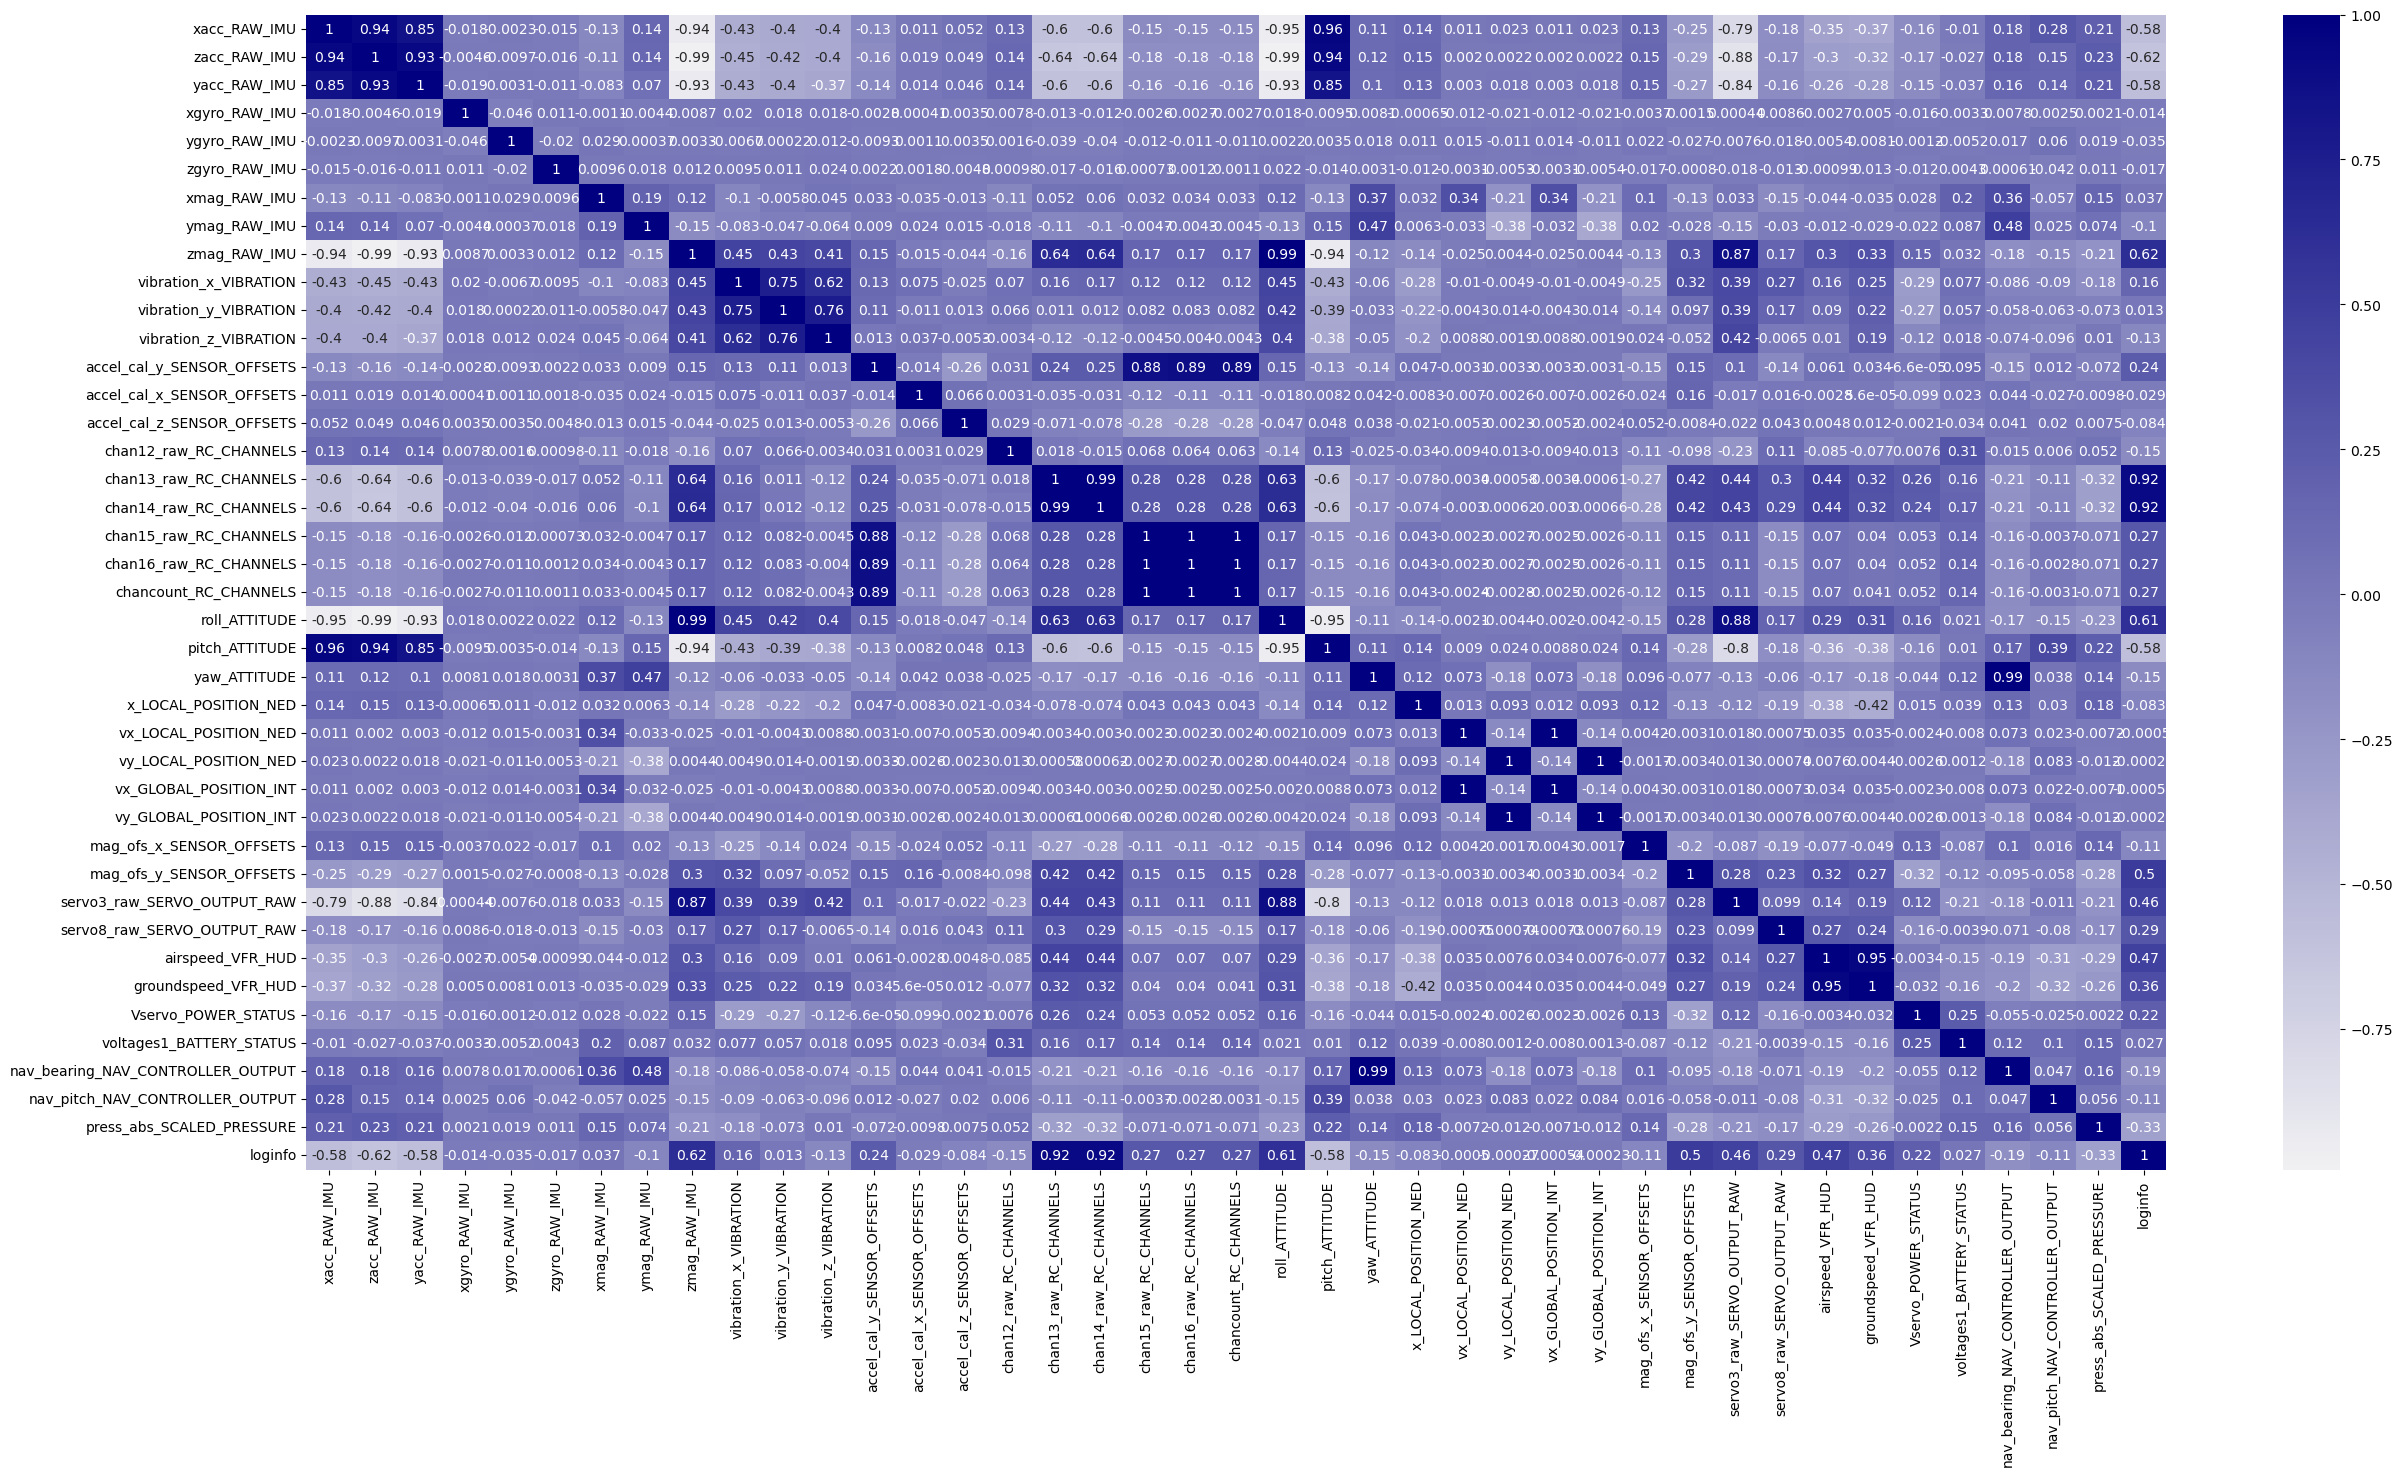

In [10]:
# heatmap
plt.figure(figsize=(30,15))
cmap = sns.light_palette("navy", as_cmap=True)
sns.heatmap(train_df.corr(), annot=True, cmap=cmap)
plt.show()

In [11]:
# feature_lable_split
train_x = train_df.iloc[:,0:-1] 
labeled_train_y = train_df.iloc[:,-1]
test_x = test_df.iloc[:,0:-1]
labeled_test_y = test_df.iloc[:,-1]
print(train_x.shape, labeled_train_y.shape, test_x.shape, labeled_test_y.shape) #(1173933, 40) (1173933,) (293484, 40) (293484,)

(1173933, 40) (1173933,) (293484, 40) (293484,)


In [12]:
# feature data Scaleing 
from sklearn.preprocessing import MinMaxScaler

## train
scaled_train_x = MinMaxScaler().fit_transform(train_x)
scaled_train_x=pd.DataFrame(data=scaled_train_x, columns=train_x.columns)
## test
scaled_test_x = MinMaxScaler().fit_transform(test_x)
scaled_test_x=pd.DataFrame(data=scaled_test_x, columns=train_x.columns)

scaled_train_x.describe()

,xacc_RAW_IMU,zacc_RAW_IMU,yacc_RAW_IMU,xgyro_RAW_IMU,ygyro_RAW_IMU,zgyro_RAW_IMU,xmag_RAW_IMU,ymag_RAW_IMU,zmag_RAW_IMU,vibration_x_VIBRATION,vibration_y_VIBRATION,vibration_z_VIBRATION,accel_cal_y_SENSOR_OFFSETS,accel_cal_x_SENSOR_OFFSETS,accel_cal_z_SENSOR_OFFSETS,chan12_raw_RC_CHANNELS,chan13_raw_RC_CHANNELS,chan14_raw_RC_CHANNELS,chan15_raw_RC_CHANNELS,chan16_raw_RC_CHANNELS,chancount_RC_CHANNELS,roll_ATTITUDE,pitch_ATTITUDE,yaw_ATTITUDE,x_LOCAL_POSITION_NED,vx_LOCAL_POSITION_NED,vy_LOCAL_POSITION_NED,vx_GLOBAL_POSITION_INT,vy_GLOBAL_POSITION_INT,mag_ofs_x_SENSOR_OFFSETS,mag_ofs_y_SENSOR_OFFSETS,servo3_raw_SERVO_OUTPUT_RAW,servo8_raw_SERVO_OUTPUT_RAW,airspeed_VFR_HUD,groundspeed_VFR_HUD,Vservo_POWER_STATUS,voltages1_BATTERY_STATUS,nav_bearing_NAV_CONTROLLER_OUTPUT,nav_pitch_NAV_CONTROLLER_OUTPUT,press_abs_SCALED_PRESSURE
count,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06,1.173933e+06
mean,4.938230e-01,2.929251e-01,5.376132e-01,4.810818e-01,3.660624e-01,5.879136e-01,5.619067e-01,8.355901e-01,4.325582e-01,5.027124e-02,3.763859e-02,4.602763e-02,5.939645e-01,5.510706e-01,4.170027e-01,6.480845e-01,4.738503e-01,5.274672e-01,9.570726e-02,9.502661e-02,1.287220e-01,4.341761e-01,5.701919e-01,6.094820e-01,5.188612e-01,5.954690e-01,5.931750e-01,5.954643e-01,5.931778e-01,6.260617e-01,7.158638e-01,5.299463e-01,1.023201e-01,1.367266e-01,1.044599e-01,1.278027e-01,3.654184e-01,6.170910e-01,6.478341e-01,9.599221e-01
std,2.193108e-02,4.446633e-02,1.847680e-02,6.381691e-03,5.236376e-03,5.736472e-03,5.488857e-02,5.479530e-02,4.164295e-02,4.804586e-02,3.869408e-02,4.970175e-02,7.579220e-02,6.265628e-02,3.930641e-02,7.992434e-02,3.262000e-01,3.606840e-01,2.495076e-01,2.472529e-01,3.348921e-01,1.423101e-01,8.212594e-02,2.650666e-01,8.319294e-02,7.623129e-02,5.462300e-02,7.621631e-02,5.461351e-02,1.003753e-01,1.223144e-01,1.923029e-01,2.558853e-01,2.003677e-01,1.352522e-01,3.222227e-01,1.581093e-01,2.671767e-01,2.887244e-02,5.056283e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.817992e-01,2.723895e-01,5.283625e-01,4.798768e-01,3.648326e-01,5.872333e-01,5.083772e-01,7.947761e-01,4.445970e-01,7.959870e-03,6.582109e-03,1.957860e-02,5.681510e-01,5.536453e-01,4.212504e-01,6.693548e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.865808e-01,5.269282e-01,4.079197e-01,5.336386e-01,5.923119e-01,5.902648e-01,5.923180e-01,5.902887e-01,5.639229e-01,6.348624e-01,4.776786e-01,0.000000e+00,0.000000e+00,3.252164e-03,0.000000e+00,3.408833e-01,4.091944e-01,6.336490e-01,9.434986e-01
50%,4.866576e-01,2.739774e-01,5.306920e-01,4.809272e-01,3.660210e-01,5.877351e-01,5.457157e-01,8.537992e-01,4.503369e-01,4.002298e-02,2.985162e-02,3.579137e-02,5.681510e-01,5.536453e-01,4.212504e-01,6.693548e-01,7.144907e-01,7.888068e-01,0.000000e+00,0.000000e+00,0.000000e+00,4.947145e-01,5.428127e-01,6.759469e-01,5.451828e-01,5.957993e-01,5.929695e-01,5.957993e-01,5.929956e-01,6.199650e-01,6.477064e-01,5.870536e-01,0.000000e+00,6.979696e-03,8.918711e-03,7.415647e-04,3.545740e-01,6.941111e-01,6.538873e-01,9.693433e-01
75%,4.921206e-0

## 3. Modeling

In [20]:
# holdout
from sklearn.model_selection import train_test_split

X_train, X_vaild, y_train, y_vaild = train_test_split(scaled_train_x, labeled_train_y, test_size=0.3, random_state=777, stratify=labeled_train_y) 
print(X_train.shape, y_train.shape, X_vaild.shape, y_vaild.shape) # (821753, 40) (352180, 40) (821753,) (352180,)

(821753, 40) (821753,) (352180, 40) (352180,)


In [24]:
# RandomForestClassifier Train
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()   # random_state = ?
rf.fit(X_train, y_train)

print(rf.score(X_vaild, y_vaild)) # 0.9940456584701005

0.9940513373842921


In [22]:
# RandomForestClassifier Predict
from sklearn.metrics import accuracy_score, f1_score

y_pred = rf.predict(scaled_test_x)

In [23]:
# RandomForestClassifier Score
print('rf_accuracy_score : {:.2f} %'.format(accuracy_score(labeled_test_y, y_pred)*100))
print('rf_f1_socre : {:.2f} %'.format(f1_score(labeled_test_y, y_pred)*100))

rf_accuracy_score : 83.38 %
rf_f1_socre : 85.66 %


In [27]:
# GBM Train
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()  # random_state = ?
gbm.fit(X_train, y_train)   # 학습시간이 RandomForest에 비해 오래걸림, 보통 예측 성능이 더 뛰어나지만 시간이 느린 것이 단점으로 꼽힘

print(gbm.score(X_vaild, y_vaild)) #0.9963796922028508

0.9963796922028508


In [28]:
# GBM Predict
y_pred = gbm.predict(scaled_test_x)

In [29]:
# GBM Score
print('gbm_accuracy_score : {:.2f} %'.format(accuracy_score(labeled_test_y, y_pred)*100))
print('gbm_f1_socre : {:.2f} %'.format(f1_score(labeled_test_y, y_pred)*100))

gbm_accuracy_score : 80.93 %
gbm_f1_socre : 83.19 %


## 4. Hyperparameters Tuning

# 5. Model Save

In [30]:
# Save Model
import joblib
joblib.dump(rf, './models/RandomForestClassifier.pkl')
joblib.dump(gbm, './models/GradientBoostingClassifier.pkl')

['./models/GradientBoostingClassifier.pkl']

In [32]:
# Load Model
rf_load = joblib.load('./models/RandomForestClassifier.pkl')
rf_pred = rf_load.predict(scaled_test_x)
gbm_load = joblib.load('./models/GradientBoostingClassifier.pkl')
gbm_pred = gbm_load.predict(scaled_test_x)

print('loadRF_accuracy_score : {:.2f} %'.format(accuracy_score(labeled_test_y, rf_pred)*100))
print('loadRF_f1_socre : {:.2f} %'.format(f1_score(labeled_test_y, rf_pred)*100))
print('-'*40)
print('loadGBM_accuracy_score : {:.2f} %'.format(accuracy_score(labeled_test_y, gbm_pred)*100))
print('loadGBM_f1_socre : {:.2f} %'.format(f1_score(labeled_test_y, gbm_pred)*100))

loadRF_accuracy_score : 94.00 %
loadRF_f1_socre : 95.26 %
----------------------------------------
loadGBM_accuracy_score : 80.93 %
loadGBM_f1_socre : 83.19 %


# 6. etc

In [19]:
# 라벨데이터 편향성 확인
labeled_test_y.value_counts()

1    194501
0     98983
Name: loginfo, dtype: int64